# Chapter 5: State-of-the-art in Deep Learning (Transformers)

Bab ini membahas revolusi arsitektur Transformer yang menggantikan dominasi RNN dalam tugas NLP (Natural Language Processing). Fokus utamanya adalah mekanisme Attention yang memungkinkan model memproses data secara paralel.

---

## 5.1 Representasi Teks: Tokenisasi & Padding
Komputer tidak memahami teks, sehingga teks harus diubah menjadi angka.
* **Token ID**: Setiap kata unik atau sub-kata diberikan ID numerik acak.
* **Padding & Truncating**: Karena model saraf memerlukan ukuran input yang tetap, kalimat pendek "ditambal" dengan nol (*padding*), sementara kalimat yang terlalu panjang akan dipotong (*truncating*).

---

## 5.2 Arsitektur Encoder-Decoder
Model Transformer orisinal menggunakan struktur Encoder-Decoder yang kuat:
* **Encoder**: Bertugas memahami konteks kalimat input secara keseluruhan dan mengubahnya menjadi *Latent Representation* (vektor makna).
* **Decoder**: Mengambil representasi tersebut untuk menghasilkan output kata demi kata (misal: dalam mesin translasi).



---

## 5.3 Komponen Utama Transformer

### 1. Self-Attention Layers
Inilah "otak" dari Transformer. Mekanisme ini memungkinkan model melihat hubungan antara setiap kata dalam satu kalimat secara bersamaan.
* **Query (Q)**: Mewakili kata yang sedang diproses.
* **Key (K)**: Mewakili semua kata dalam kalimat sebagai kandidat untuk dicocokkan.
* **Value (V)**: Informasi yang akan diteruskan jika Query dan Key cocok.
* **Rumus Matematis**:
  $$Attention(Q, K, V) = \text{softmax}\left(\frac{QK^T}{\sqrt{d_k}}\right)V$$

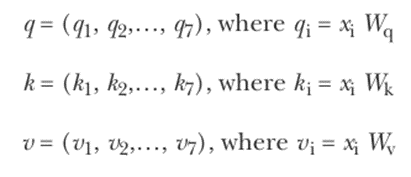

### 2. Multi-Head Attention
Daripada hanya satu "perhatian", model menggunakan banyak *head* paralel.
* Setiap *head* belajar fokus pada hubungan yang berbeda (misal: satu *head* fokus pada subjek, *head* lain fokus pada kata kerja).
* Hasilnya kemudian digabungkan untuk mendapatkan pemahaman konteks yang kaya.

### 3. Masked Self-Attention (Khusus Decoder)
Untuk mencegah model "mencontek" kata masa depan saat fase latihan, digunakan **Masking**.
* Model hanya diperbolehkan melihat kata-kata sebelumnya (posisi $i < t$) saat mencoba memprediksi kata pada posisi $t$.

---

## 5.4 Fully Connected Layers (Point-wise FFN)
Setelah melalui *Attention*, setiap elemen diproses melalui lapisan Fully Connected yang identik.
* Fungsi utamanya adalah melakukan transformasi nonlinear pada setiap posisi secara independen.
* Formula dasar: $FFN(x) = \max(0, xW_1 + b_1)W_2 + b_2$.

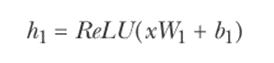
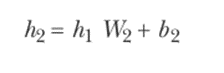

---

## 5.5 Implementasi dengan Keras Functional API
Membangun Transformer di TensorFlow memerlukan penggabungan komponen menggunakan `tf.keras.layers`.

**Struktur Layer pada Encoder:**
1.  **Multi-Head Attention Layer**: Menghasilkan representasi kontekstual.
2.  **Add & Norm**: Menambahkan *Residual Connection* (untuk stabilitas gradien) dan *Layer Normalization*.
3.  **Feed Forward Layer**: FCLayer untuk pemrosesan fitur lebih lanjut.

**Struktur Layer pada Decoder:**
1.  **Masked Multi-Head Attention**: Melihat konteks kata yang sudah dihasilkan sebelumnya.
2.  **Encoder-Decoder Attention**: Menggabungkan output dari Encoder dengan informasi Decoder saat ini.
3.  **Feed Forward Layer**: Menghasilkan output final.

---

## 5.6 Tip Instalasi & Library Tambahan
Saat masuk ke bab ini dan seterusnya, kamu seringkali perlu menggunakan pustaka eksternal untuk mendapatkan model yang sudah jadi:

```python
# Instalasi library Transformers dari Hugging Face (Sering digunakan bersama TF)
!pip install transformers

# Memanggil model Transformer sederhana melalui TensorFlow
from tensorflow.keras.layers import MultiHeadAttention, LayerNormalization, Dense